<a href="https://colab.research.google.com/github/Serhii-Kravchenko-2022/Home_work_Data_Science8/blob/main/Hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1. Напишіть функцію гіпотези лінійної регресії у векторному вигляді:

In [5]:
def hipotesa(X, w):
    return np.dot(X, w)

2. Cтворіть функцію для обчислення функції втрат у векторному вигляді:

In [6]:
def loss_function(X, y, w):
    m = X.shape[0]
    return np.square(hipotesa(X, w) - y).sum()/(2*m)

3. Pеалізуйте один крок градієнтного спуску:

In [7]:
def grad_step(w, grad_w, learning_rate=0.001):
    w = w - learning_rate*grad_w
    return w

In [8]:
def grad_w(X, y, w):
    m = X.shape[0]
    return np.dot(X.T, (hipotesa(X, w) - y)) / m

In [17]:
def grad_descent(w, X, y, iter_count=10000, learning_rate=0.001, epsilon=0.0000001):

    loss = loss_function(X, y, w)
    loss_history = [loss]

    for i in range(iter_count):
        w_best = None
        d_w = grad_w(X, y, w)
        w = grad_step(w, d_w, learning_rate=learning_rate)

        loss = loss_function(X, y, w)
        if abs(loss - loss_history[-1]) < epsilon:
            loss_history.append(loss)
            w_best = d_w
            break
        
        loss_history.append(loss)
        

    return w, w_best, loss_history

4. Знайдіть найкращі параметри w для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень:

In [4]:
from google.colab import drive

drive.mount('/DataScience8')
file = '/DataScience8/MyDrive/DataScience8/Housing.csv'
df = pd.read_csv(file)
df.head()

Drive already mounted at /DataScience8; to attempt to forcibly remount, call drive.mount("/DataScience8", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
def normalization(data):
    return (data - data.mean())/data.std()

In [11]:
norm_df = pd.DataFrame()

norm_df["price"] = normalization(df["price"])
norm_df["area"] = normalization(df["area"])
norm_df["bathrooms"] = normalization(df["bathrooms"])
norm_df["bedrooms"] = normalization(df["bedrooms"])

In [12]:
X = norm_df[['area', 'bathrooms', 'bedrooms']].values
X = np.hstack((np.ones((X.shape[0], 1)) , X))
y = norm_df["price"].values.reshape(-1, 1)

n = X.shape[1]
w = np.linspace(0, 0, n).reshape((n, 1))

In [13]:
w, w_best, loss_history = grad_descent(w, X, y, 10000, learning_rate=0.001)
loss_best = loss_history[-1]
print('The best values w: ', w_best.flatten())
print('The best values of loss function: ', loss_best)

The best values w:  [-1.46671666e-17 -6.74033514e-03 -4.72771123e-03  5.66844067e-03]
The best values of loss function:  0.25605342833253486


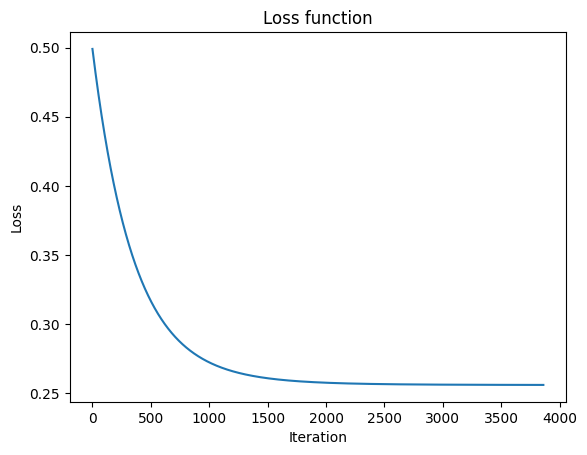

In [18]:
sns.lineplot(x=np.arange(len(loss_history)), y=[k for k in loss_history])
plt.title('Loss function')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

5. Знайдіть ці ж параметри за допомогою аналітичного рішення:

In [20]:
analitic_w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
analitic_loss = loss_function(X, y, analitic_w)
print('The best analitic w: ', analitic_w.flatten())
print('The best analitic loss function: ', analitic_loss)

The best analitic w:  [-3.03013178e-16  4.39452085e-01  3.72344423e-01  1.60528660e-01]
The best analitic loss function:  0.2559879006532141


6. Порівняйте отримані результати:

In [21]:
print('The best value of loss function: ', loss_best)
print('The best analitic loss function: ', analitical_loss)

The best value of loss function:  0.25605342833253486
The best analitic loss function:  0.2559879006532141
